In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [2]:
base_path = '/ssd2/chetanp'

In [3]:
losses = []
for i in range(7):
    path = os.path.join(base_path, f'loss_{i}.csv')
    with open(path, 'r') as myfile:
        reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            losses.append(row)

In [4]:
losses = np.array(losses)

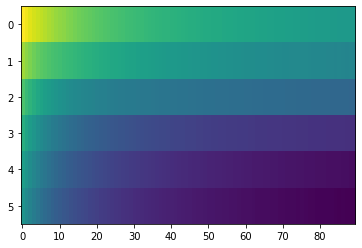

In [5]:
plt.imshow(losses[:,10:], aspect = 'auto')
plt.show()

In [6]:
path = os.path.join(base_path, f'final_loss.csv')
final_losses = []
with open(path, 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        final_losses.append(row)
final_losses.append([5,6,7,8,9,10,11])

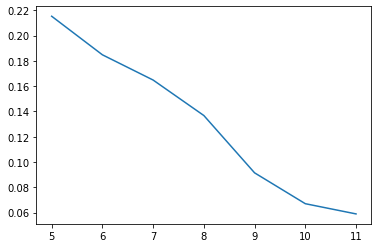

In [7]:
final_losses = np.array(final_losses)

plt.plot(final_losses[1],final_losses[0])
plt.show()

In [8]:
model = LinearRegression()
model.fit(X = final_losses[1,None].T, y = final_losses[0,None].T)
print('Slope : ', np.squeeze(model.coef_))
print('Intercept : ', np.squeeze(model.intercept_))
print('R^2 : ', model.score(X = final_losses[1,None].T, y = final_losses[0,None].T))

Slope :  -0.027786105358022808
Intercept :  0.3535970420557625
R^2 :  0.9813736584823808


In [9]:
path = os.path.join(base_path, f'val_loss.csv')
val_losses = []
with open(path, 'r') as myfile:
    reader = csv.reader(myfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        val_losses.append(row)
val_losses.append([5,6,7,8,9,10,11])

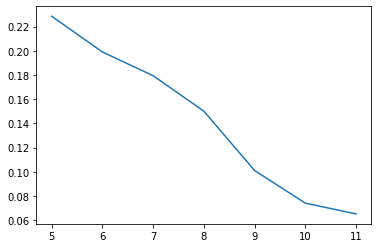

In [10]:
val_losses = np.array(val_losses)

plt.plot(val_losses[1],val_losses[0])
plt.show()

In [11]:
model = LinearRegression()
model.fit(X = val_losses[1,None].T, y = val_losses[0,None].T)
print('Slope : ', np.squeeze(model.coef_))
print('Intercept : ', np.squeeze(model.intercept_))
print('R^2 : ', model.score(X = val_losses[1,None].T, y = val_losses[0,None].T))

Slope :  -0.02921092696487903
Intercept :  0.3761897706796252
R^2 :  0.9803715914408103


In [12]:
print('Train Loss : ', final_losses[0])
print('Test Loss : ', final_losses [0])

Train Loss :  [0.21530497 0.1848081  0.16484072 0.136777   0.09144327 0.0670324
 0.05895094]
Test Loss :  [0.21530497 0.1848081  0.16484072 0.136777   0.09144327 0.0670324
 0.05895094]
